In [10]:
!pip install pandas numpy networkx scikit-learn matplotlib seaborn


Feature Distributions for Graph1:
               Node       Degree   Clustering  AvgNeighborDegree
count   5242.000000  5242.000000  5242.000000        5242.000000
mean   13111.285769     5.530713     0.529636           9.693583
std     7584.189428     7.919163     0.428723           8.903178
min       13.000000     1.000000     0.000000           1.000000
25%     6389.250000     2.000000     0.000000           4.000000
50%    13287.000000     3.000000     0.500000           7.414286
75%    19552.500000     6.000000     1.000000          12.333333
max    26196.000000    81.000000     1.000000          73.500000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


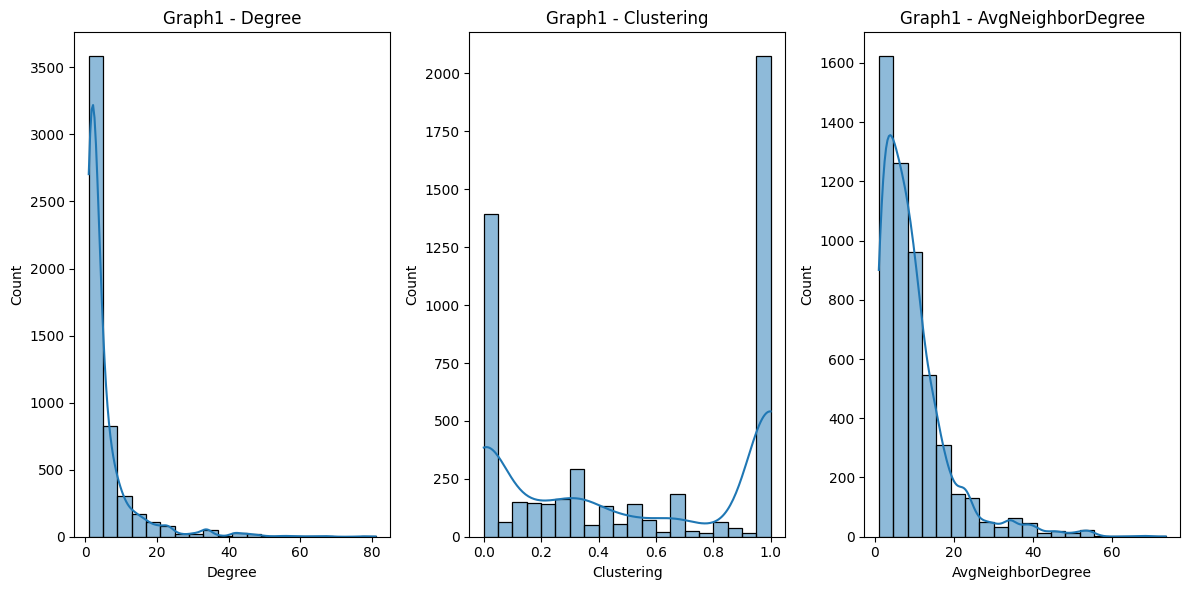


Feature Distributions for Graph2:
              Node       Degree   Clustering  AvgNeighborDegree
count  5242.000000  5242.000000  5242.000000        5242.000000
mean   2620.500000     5.530713     0.529636           9.693583
std    1513.379386     7.919163     0.428723           8.903178
min       0.000000     1.000000     0.000000           1.000000
25%    1310.250000     2.000000     0.000000           4.000000
50%    2620.500000     3.000000     0.500000           7.414286
75%    3930.750000     6.000000     1.000000          12.333333
max    5241.000000    81.000000     1.000000          73.500000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


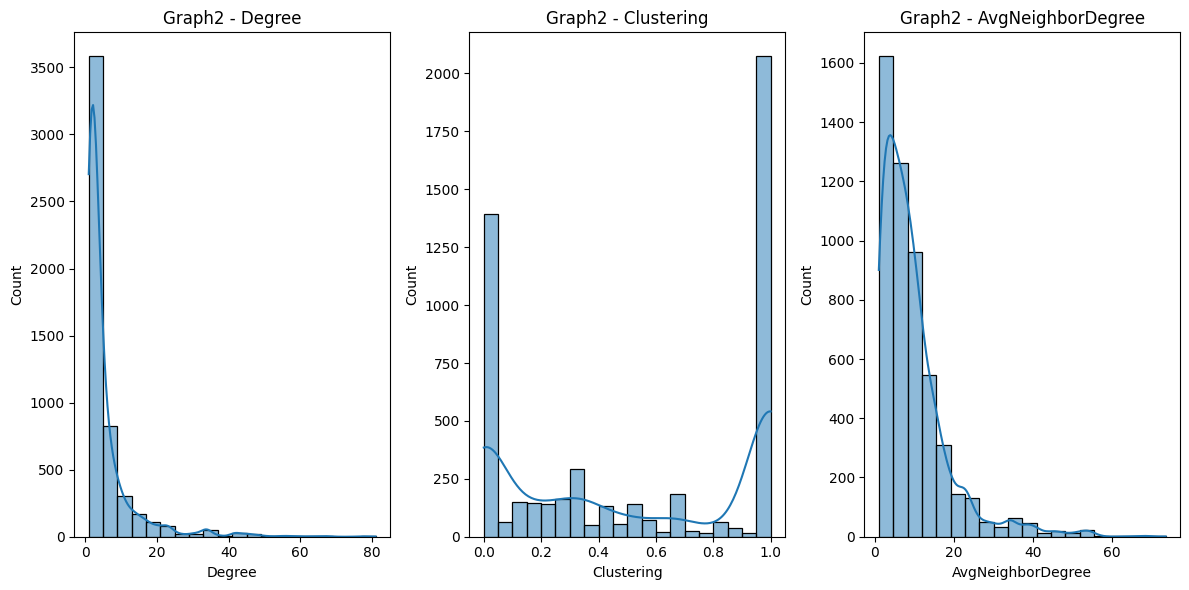


Feature Importance:
                Feature  Importance
2  G1_AvgNeighborDegree    0.191225
3             G2_Degree    0.181072
5  G2_AvgNeighborDegree    0.179376
4         G2_Clustering    0.162567
0             G1_Degree    0.147696
1         G1_Clustering    0.138064


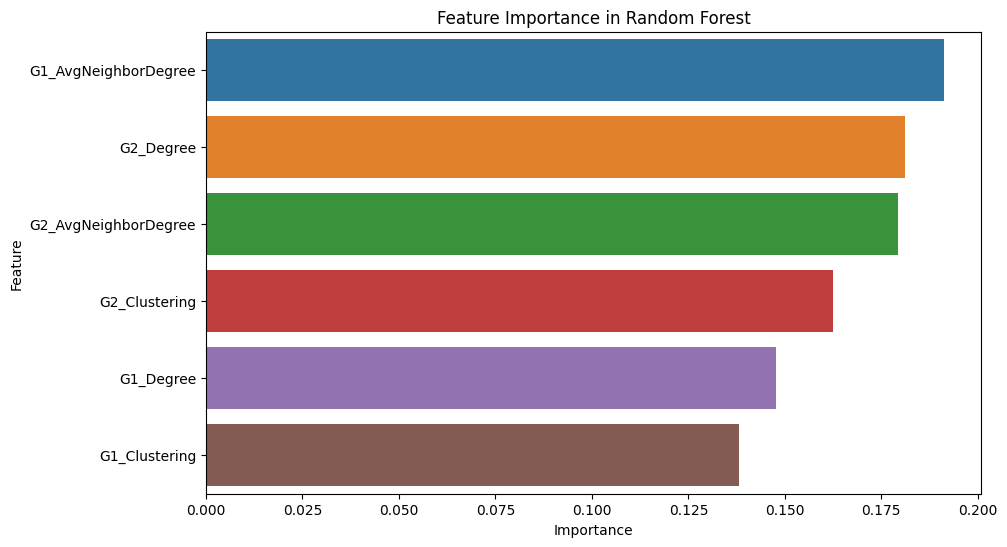


No unmapped predictions to display.
Model Accuracy: 0.99
No unmapped predictions to display.


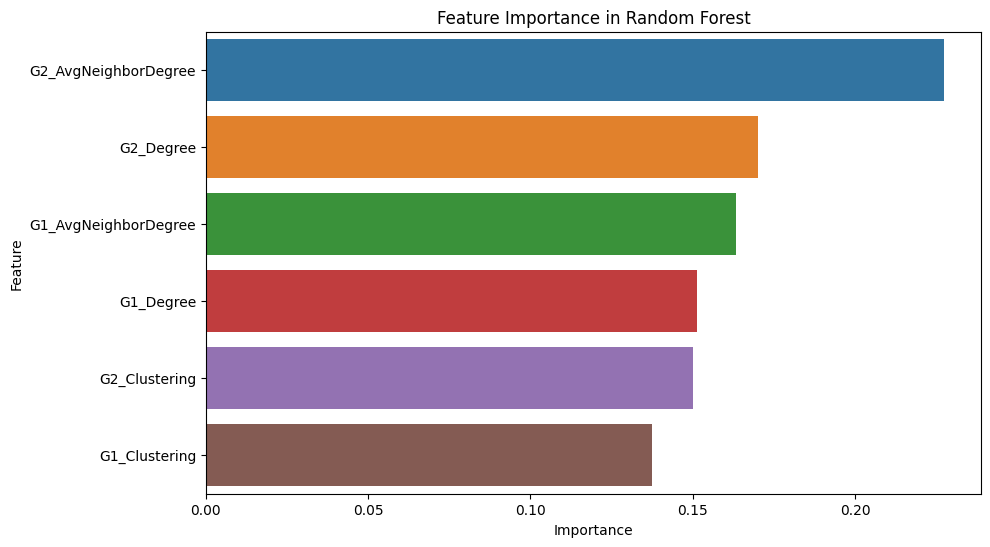

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load graphs
G1 = nx.read_edgelist("/kaggle/input/graph-data/ca-GrQc_Graph1_edgelist.txt", nodetype=int)
G2 = nx.read_edgelist("/kaggle/input/graph-data/ca-GrQc_Graph2_edgelist.txt", nodetype=int)

# Load mapping
node_mapping = {}
with open("/kaggle/input/graph-data/ca-GrQc_node_mapping.txt", "r") as f:
    for line in f:
        g1_node, g2_node = map(int, line.split())
        node_mapping[g1_node] = g2_node

# Extract features for a graph
def extract_features(G):
    features = []
    for node in G.nodes():
        degree = G.degree[node]
        clustering = nx.clustering(G, node)
        avg_neighbor_degree = nx.average_neighbor_degree(G)[node]
        features.append([node, degree, clustering, avg_neighbor_degree])
    return pd.DataFrame(features, columns=["Node", "Degree", "Clustering", "AvgNeighborDegree"])

features_G1 = extract_features(G1)
features_G2 = extract_features(G2)

# Display feature distributions for Graph1 and Graph2
def display_feature_distributions(features, graph_name):
    print(f"\nFeature Distributions for {graph_name}:")
    print(features.describe())  # Summarized statistics
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(features.columns[1:], 1):  # Skip "Node" column
        plt.subplot(1, 3, i)
        sns.histplot(features[column], kde=True, bins=20)
        plt.title(f"{graph_name} - {column}")
    plt.tight_layout()
    plt.show()

# Call for Graph1 and Graph2
display_feature_distributions(features_G1, "Graph1")
display_feature_distributions(features_G2, "Graph2")

# Display Feature Importance
def display_feature_importance(model, X_train):
    feature_importance = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance)
    plt.title("Feature Importance in Random Forest")
    plt.show()

# Call for feature importance
display_feature_importance(clf, X_train)

# Display top predictions
def display_top_predictions(predictions):
    if predictions:
        top_predictions = pd.DataFrame(predictions[:10], columns=["Graph1_Node", "Graph2_Node", "Confidence"])
        print("\nTop Predictions for Unmapped Nodes:")
        print(top_predictions)

        plt.figure(figsize=(10, 6))
        sns.barplot(x="Confidence", y="Graph1_Node", data=top_predictions)
        plt.title("Top Predictions for Unmapped Nodes")
        plt.xlabel("Confidence Score")
        plt.ylabel("Graph1 Node")
        plt.show()
    else:
        print("\nNo unmapped predictions to display.")

# Call for predictions
display_top_predictions(unmapped_predictions)

# Create labeled training data
mapped_data = []
for g1_node, g2_node in node_mapping.items():
    g1_features = features_G1[features_G1["Node"] == g1_node].iloc[:, 1:].values.flatten()
    g2_features = features_G2[features_G2["Node"] == g2_node].iloc[:, 1:].values.flatten()
    mapped_data.append(np.concatenate((g1_features, g2_features, [1])))  # Label 1 for true mapping

# Add random negative examples (ensure no true mapping)
neg_samples = len(node_mapping)  # Add as many negative samples as positive
for _ in range(neg_samples):
    g1_node = np.random.choice(features_G1["Node"])
    g2_node = np.random.choice(features_G2["Node"])
    if node_mapping.get(g1_node) != g2_node:  # Ensure no true mapping
        g1_features = features_G1[features_G1["Node"] == g1_node].iloc[:, 1:].values.flatten()
        g2_features = features_G2[features_G2["Node"] == g2_node].iloc[:, 1:].values.flatten()
        mapped_data.append(np.concatenate((g1_features, g2_features, [0])))  # Label 0 for false mapping

# Prepare dataset
columns = ["G1_Degree", "G1_Clustering", "G1_AvgNeighborDegree",
           "G2_Degree", "G2_Clustering", "G2_AvgNeighborDegree", "Label"]
data = pd.DataFrame(mapped_data, columns=columns)

# Train/test split
X = data.iloc[:, :-1]
y = data["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Test accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Predict unmapped nodes
unmapped_predictions = []
for g1_node in set(G1.nodes()) - set(node_mapping.keys()):
    g1_features = features_G1[features_G1["Node"] == g1_node].iloc[:, 1:].values.flatten()
    for g2_node in set(G2.nodes()) - set(node_mapping.values()):
        g2_features = features_G2[features_G2["Node"] == g2_node].iloc[:, 1:].values.flatten()
        prediction = clf.predict_proba([np.concatenate((g1_features, g2_features))])[0, 1]
        unmapped_predictions.append((g1_node, g2_node, prediction))

# Sort predictions by confidence
unmapped_predictions = sorted(unmapped_predictions, key=lambda x: -x[2])

# Visualize top predictions for unmapped nodes
if unmapped_predictions:
    # Convert top predictions to DataFrame
    top_predictions = pd.DataFrame(unmapped_predictions[:10], columns=["Graph1_Node", "Graph2_Node", "Confidence"])

    # Plot Top Predictions for Unmapped Nodes
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Confidence", y="Graph1_Node", data=top_predictions)
    plt.title("Top Predictions for Unmapped Nodes")
    plt.xlabel("Confidence Score")
    plt.ylabel("Graph1 Node")
    plt.show()
else:
    print("No unmapped predictions to display.")

# Feature importance visualization
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance in Random Forest")
plt.show()
